## Installing Required Packages

In [1]:
!pip install fredapi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from fredapi import Fred
from google.colab import userdata

fred_key = userdata.get('fred_api')

# Create A  Fred Object

In [3]:
fred = Fred(api_key=fred_key)

# Search For Economic Data

In [4]:
ap_search = fred.search("S&P",order_by = "popularity")
ap_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-11-05,2024-11-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-11-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-04 09:09:14-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-11-05,2024-11-05,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-11-05,2024-11-05,S&P 500,2014-11-05,2024-11-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-04 19:12:04-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-11-05,2024-11-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-11-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-04 09:09:17-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-11-05,2024-11-05,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-11-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-04 09:16:02-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-11-05,2024-11-05,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-11-05,2024-11-05,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2024-11-05,2024-11-05,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


## Pull Raw Data

<Axes: >

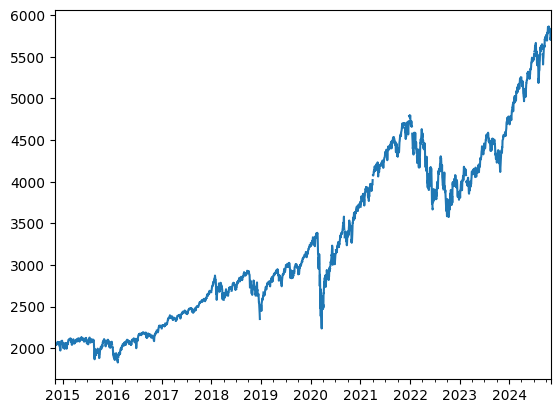

In [5]:
sp500 = fred.get_series(series_id="SP500")
sp500.plot()

# Pull And join Multiple Data Series

In [6]:
unemp_df = fred.search("unemployment rate state", filter= ("frequency", "Monthly"))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [7]:
all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)
unemp_results = unemp_results.loc[:, unemp_results.columns.str.len() <= 4]

## Columns To Drop

In [8]:
unemp_state = unemp_results.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_state.columns=[id_to_state[c] for c in unemp_state.columns]

## Plot States Unemployment Rate


In [9]:
px.line(unemp_state, title="Unemployment Rate State")

## Pull April 2020 unemployment Rate Per State

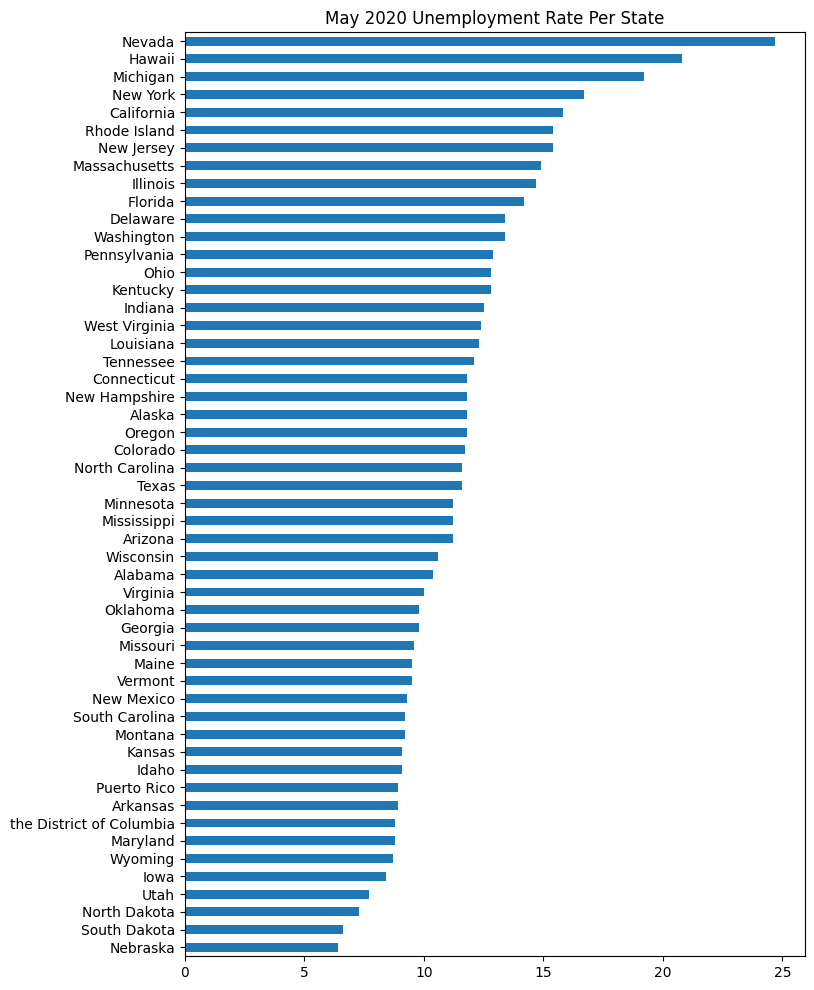

In [10]:
ax = unemp_state.loc[unemp_state.index == '2020-05-01'].T \
.sort_values(by='2020-05-01') \
.plot(kind= 'barh',figsize=(8,12),title="May 2020 Unemployment Rate Per State")

ax.legend().remove()
plt.show()

## Pull Participation Rate

In [13]:
part_df = fred.search("participation rate state", filter= ("frequency", "Monthly"))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [14]:
all_results = []

for myid in part_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)

In [15]:
part_states = pd.concat(all_results, axis=1)
part_states

,CIVPART,LNS11300060,LNS11300002,LNS11300001,LNS11324230,LNS11300012,LNS11300006,LRAC25MAUSM156S,LNS11300036,LRAC25FEUSM156S,...,LRIN25TTUSM156S,LRIN55MAUSM156S,LRIN24MAUSM156S,LRIN24FEUSM156S,LRIN74FEUSM156S,LRIN74MAUSM156S,LRIN64MAUSM156S,LRIN64FEUSM156S,LRIN55FEUSM156S,LRIN25FEUSM156S
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,NaN,NaN,64.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,64.6,32.4,87.0,43.3,53.7,NaN,NaN,64.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,64.3,32.1,86.3,43.0,54.1,NaN,NaN,63.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,64.8,33.0,86.6,43.4,54.2,NaN,NaN,63.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,64.3,32.0,86.1,43.2,50.9,NaN,NaN,63.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,62.6,83.7,57.3,68.1,38.2,37.4,62.7,89.6,71.0,77.9,...,16.38815,28.79781,43.11057,44.97167,36.84589,26.83765,20.19530,29.93114,39.82527,22.27276
2024-07-01,62.7,84.0,57.5,68.2,38.3,36.4,63.2,90.0,71.3,78.1,...,16.09643,28.70008,43.75338,44.79653,36.80392,26.79921,20.11865,29.83138,40.29926,22.03846
2024-08-01,62.7,83.9,57.8,67.9,38.6,35.7,62.7,89.5,70.5,78.4,...,16.14198,28.46689,44.81403,45.13686,36.57845,27.08280,20.47940,29.60483,39.43463,21.63231
2024-09-01,62.7,83.8,57.6,68.1,38.6,37.2,62.9,89.5,70.6,78.1,...,16.17964,28.10963,43.65094,45.22279,36.65532,26.90160,20.29987,29.65582,39.47885,21.80615


## Columns to Drop

In [16]:
cols_to_drop_part = []

for col in part_states:
  if len(col) > 8:
    cols_to_drop_part.append(col)

part_state_filter = part_states.drop(columns=cols_to_drop_part)
part_state_filter_col = part_state_filter.drop('CIVPART', axis= 1)

## Swap ID With Actual State Name

In [17]:
part_id_to_state = part_df.set_index('id')['title'].to_dict()
part_state_filter_col.columns = [part_id_to_state[c] for c in part_state_filter_col.columns]
part_state_filter_col.columns = part_state_filter_col.columns.str.replace(
    "Labor Force Participation Rate for ", "", case=False
)

# Plot Unemployment vs Participation

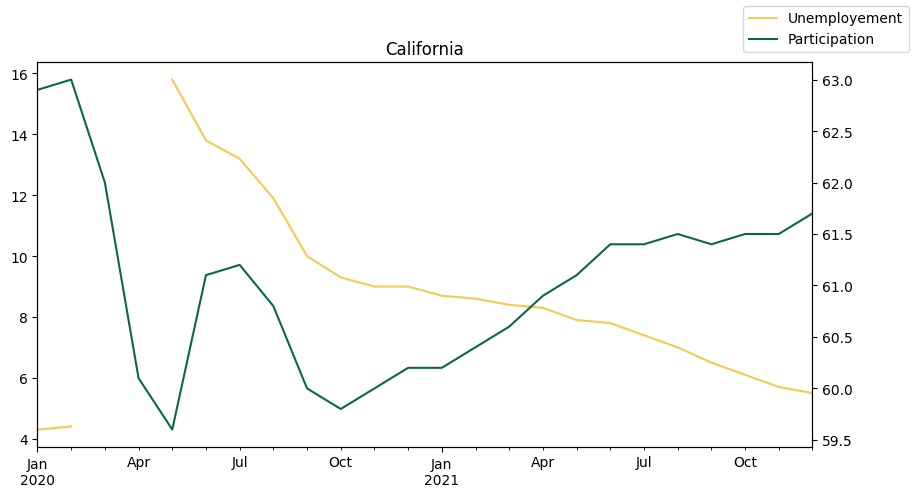

In [18]:
fig, ax = plt.subplots(figsize = (10,5), sharex = True)

ax2 = ax.twinx()

unemp_states2 = unemp_state.asfreq('MS')

l1 = unemp_states2.query('index >= 2020 and index < 2022')['California'] \
    .plot(ax = ax, label = 'Unemployement', color = '#F3CA52')

l2 = part_state_filter_col.dropna().query('index >= 2020 and index <2022')['California'] \
    .plot(ax = ax2, label = 'Participation', color = '#0A6847')

ax2.grid(False)
ax.set_title('California')
fig.legend(labels = ['Unemployement', 'Participation'])
plt.show()

## Unemployment vs Participation For Each State

In [19]:
# fix DC
unemp_state = unemp_state.rename(columns= {'the District of Columbia':'District Of Columbia'})

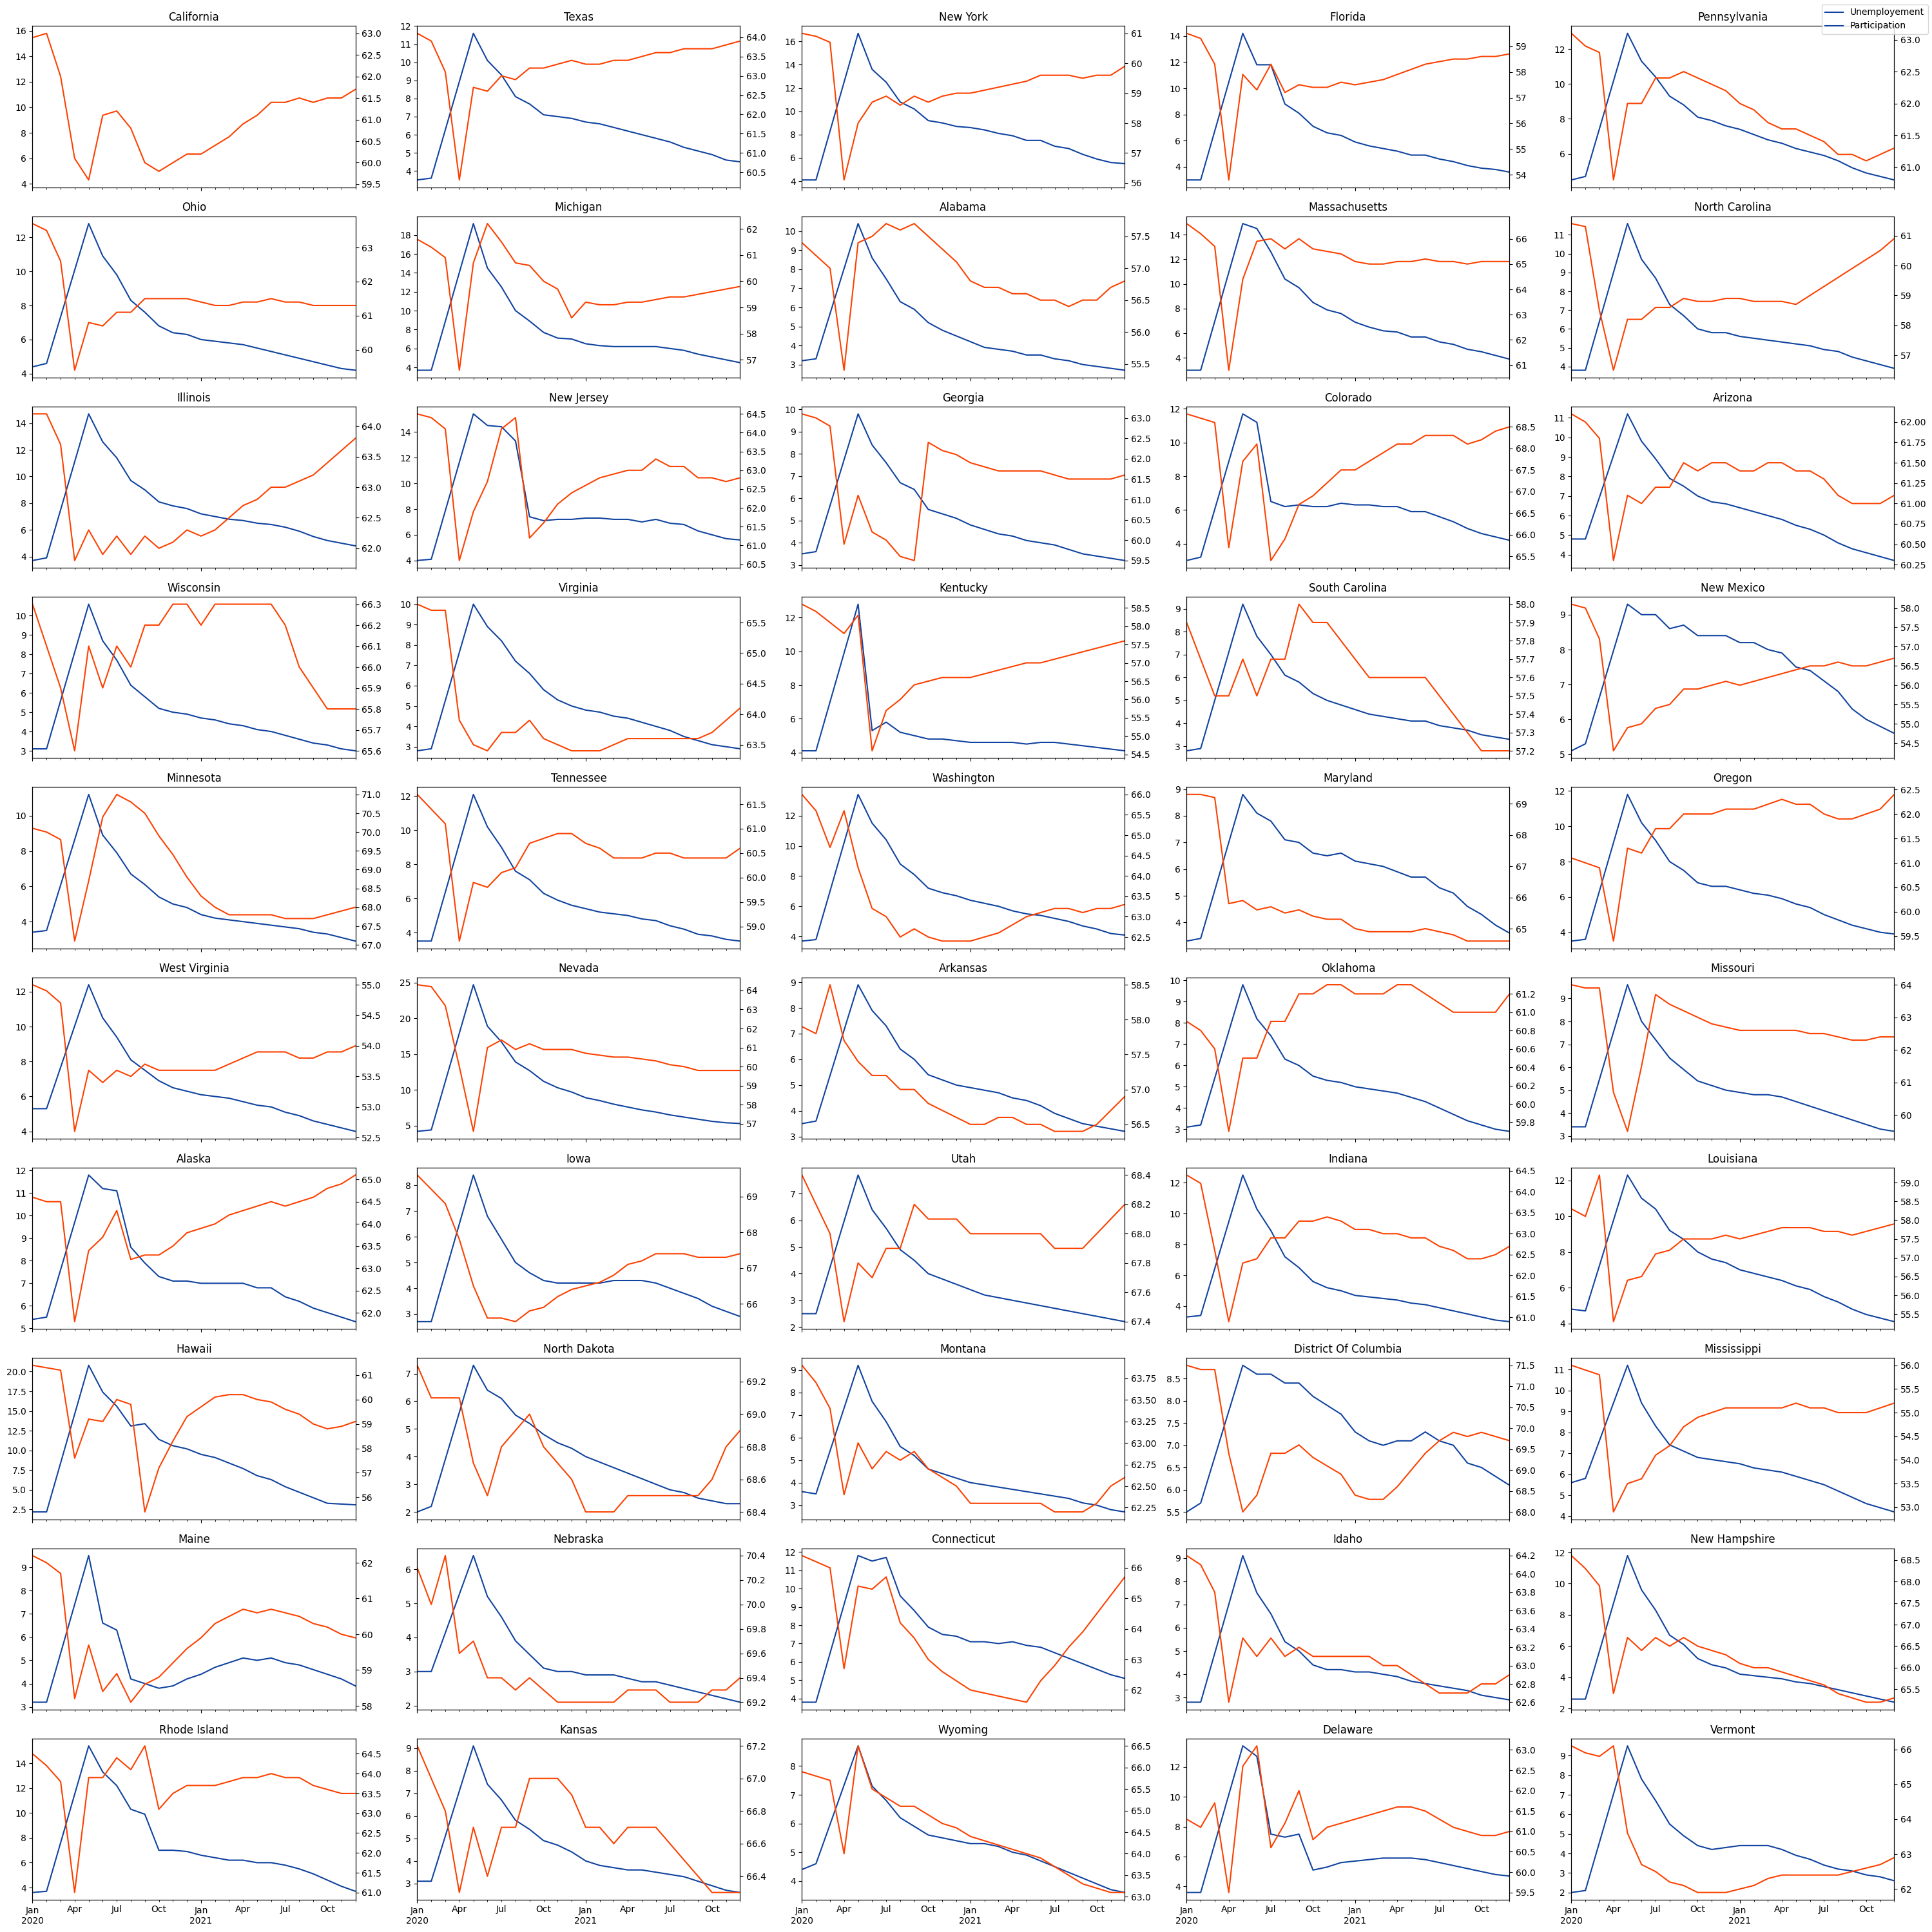

In [20]:
# Create a 10x5 grid of subplots with a shared x-axis, and set the figure size to 30x30
fig, axs = plt.subplots(10, 5, figsize = (30,30), sharex = True) # sharex = True

# Flatten the array of axes (subplots) for easier iteration
axs = axs.flatten()

# Initialize a counter variable
i = 0

# Loop over each column (state) in the unemp_states dataframe
for state in unemp_state.columns:
    # Skip the iteration if the state is 'District of Columbia' or 'Puerto Rico'
    if state in ['District of Columbia','Puerto Rico']:
        continue

    # Create a secondary y-axis for the i-th subplot
    ax2 = axs[i].twinx()

    # Plot the unemployment data for the current state on the i-th subplot's primary y-axis
    unemp_state.query('index >= 2020 and index < 2022')[state] \
    .plot(ax = axs[i], label = 'Unemployement', color = '#10439F')

    # Plot the participation data for the current state on the i-th subplot's secondary y-axis
    part_state_filter_col.query('index >= 2020 and index <2022')[state] \
    .plot(ax = ax2, label = 'Participation', color = '#FC4100')

    # Disable the grid for the secondary y-axis
    ax2.grid(False)

    # Set the title of the i-th subplot to the current state
    axs[i].set_title(state)

    # Increment the counter variable
    i += 1

    # Break the loop if i reaches the number of subplots
    if i >= len(axs):
        break


# Adjust the padding between and around the subplots
plt.tight_layout()

# Add a legend to the figure with the labels 'Unemployement' and 'Participation'
fig.legend(labels = ['Unemployement', 'Participation'])


# Display the figure with its subplots
plt.show()